# Storytelling

## Animal bites in US from 1985 to 2017

In the United States, animal bites are often reported to law enforcement (such as animal control). 

The Health_AnimalBites dataset includes information on over 9,000 animal bites which occurred near Louisville, Kentucky from 1985 to 2017 and includes information on whether the animal was quarantined after the bite occurred and whether that animal was rabid.

 Attributes of animal bite incidents reported to and investigated by Louisville Metro Department of Public Health and Wellness
    
    * bite_date: The date the bite occurred
    * SpeciesIDDesc: The species of animal that did the biting
    * BreedIDDesc: Breed (if known)
    * GenderIDDesc: Gender (of the animal)
    * color: color of the animal
    * vaccination_yrs: how many years had passed since the last vaccination
    * vaccination_date: the date of the last vaccination
    * victim_zip: the zipcode of the victim
    * AdvIssuedYNDesc: whether advice was issued
    * WhereBittenIDDesc: Where on the body the victim was bitten
    * quarantine_date: whether the animal was quarantined
    * DispositionIDDesc: whether the animal was released from quarantine
    * headsentdate: the date the animal’s head was sent to the lab
    * release_date: the date the animal was released
    * ResultsIDDesc: results from lab tests (for rabies)

Based on the input data we will try to find answers to following questions:

* Which animals are most likely to bite humans?
* Are some dog breeds more likely to bite?
* Male Vs. Female. Who is more aggressive? Does it depend on which animal?
* Is there any dependencies on the time of the yeat to be bitten by an animal?
* What factors are most strongly associated with a positive rabies test result?

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from scipy import stats


### Dataframe evaluation

In [2]:
bites = pd.read_csv('bites.csv')

In [3]:
bites.head(50)

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN
5,1989-11-24 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40211,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN
6,1990-02-08 00:00:00,DOG,NaN,FEMALE,BLACK/WHIT,1.0,1990-02-13 00:00:00,40203,NO,BODY,1990-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
7,1990-02-22 00:00:00,DOG,NaN,MALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,1990-02-23 00:00:00,RELEASED,NaN,NaN,UNKNOWN
8,1990-08-02 00:00:00,DOG,NaN,MALE,BROWN,NaN,NaN,NaN,NO,BODY,1990-08-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
9,1990-08-19 00:00:00,DOG,NaN,UNKNOWN,BRN-TAN,NaN,NaN,NaN,NO,BODY,1990-08-20 00:00:00,RELEASED,NaN,NaN,UNKNOWN


In [4]:
bites.shape

(9003, 15)

In [5]:
bites.columns

Index(['bite_date', 'SpeciesIDDesc', 'BreedIDDesc', 'GenderIDDesc', 'color',
       'vaccination_yrs', 'vaccination_date', 'victim_zip', 'AdvIssuedYNDesc',
       'WhereBittenIDDesc', 'quarantine_date', 'DispositionIDDesc',
       'head_sent_date', 'release_date', 'ResultsIDDesc'],
      dtype='object')

In [6]:
missing = pd.concat([bites.isnull().sum(), 100 * bites.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
head_sent_date,8608,95.612574
release_date,7558,83.949795
DispositionIDDesc,7468,82.950128
ResultsIDDesc,7460,82.861268
quarantine_date,6983,77.563035
AdvIssuedYNDesc,6438,71.509497
vaccination_yrs,5265,58.480506
BreedIDDesc,5244,58.247251
vaccination_date,4888,54.293013
color,2577,28.623792


In [7]:
bites['SpeciesIDDesc'].value_counts(dropna=False)

DOG        7029
CAT        1568
BAT         237
NaN         118
RACCOON      27
OTHER        11
HORSE         5
FERRET        4
RABBIT        3
SKUNK         1
Name: SpeciesIDDesc, dtype: int64

## Animal type/number of bites dependency

Text(0.5, 1.0, 'Animals type/number of bites')

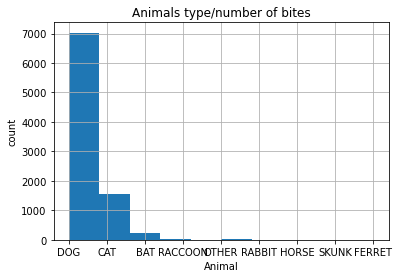

In [8]:
bites.SpeciesIDDesc.hist()
plt.xlabel('Animal')
plt.ylabel('count');
plt.title('Animals type/number of bites')

In [9]:
bites['GenderIDDesc'].value_counts(dropna=False)

MALE       3832
NaN        2526
FEMALE     2016
UNKNOWN     629
Name: GenderIDDesc, dtype: int64

MALE      3832
FEMALE    2016
Name: GenderIDDesc, dtype: int64


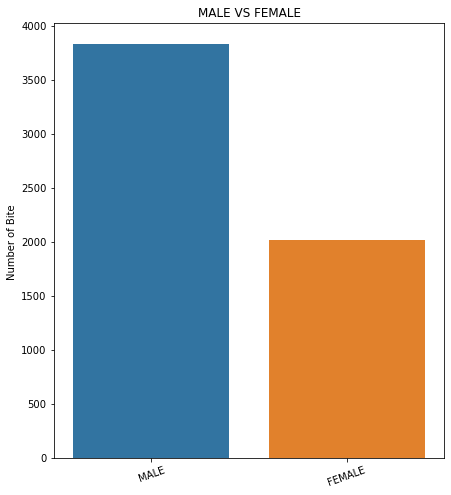

In [10]:
gender = ['MALE','FEMALE']
count_gender = bites.GenderIDDesc.value_counts()
plt.figure(figsize= (7,8))
x = sns.barplot(x=gender, y= count_gender[0:2])
plt.ylabel('Number of Bite ')
plt.xticks(rotation = 20)
plt.title('MALE VS FEMALE')
print(count_gender[0:2])

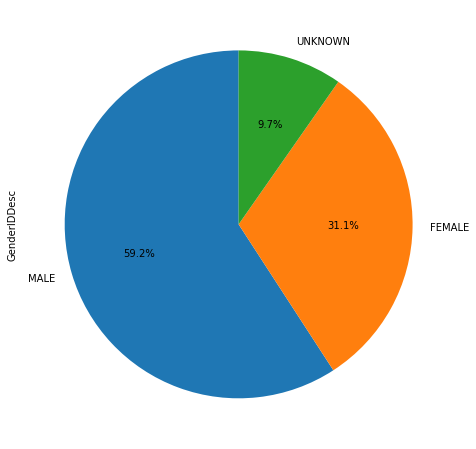

In [11]:
plt.figure(figsize= (20,8))

count_gender.plot.pie(startangle=90, autopct='%1.1f%%')
plt.show()


In [12]:
df_filtered = bites[(bites.SpeciesIDDesc=='DOG') | (bites.SpeciesIDDesc=='CAT') | (bites.SpeciesIDDesc=='BAT')]

In [13]:
df_filtered.shape

(8834, 15)

Text(0.5, 1.0, 'Species by Gender')

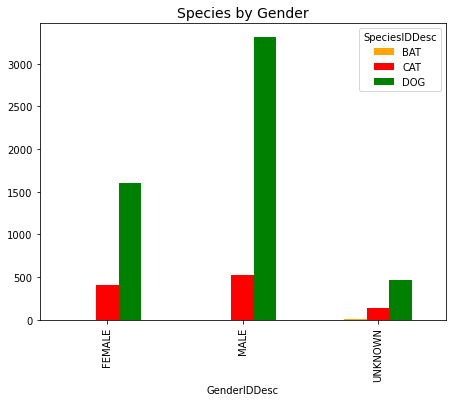

In [14]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
colors = ["orange", "red","green"]

animals_by_gender = df_filtered.groupby(['GenderIDDesc', 'SpeciesIDDesc' ]).size()
animals_by_gender.unstack().plot(kind='bar', stacked=False, ax=ax1, grid=False, color=colors)
ax1.set_title('Species by Gender', fontsize=14)


[Text(0, 0, 'Dogs'), Text(0, 0, 'Cats'), Text(0, 0, 'Bats')]

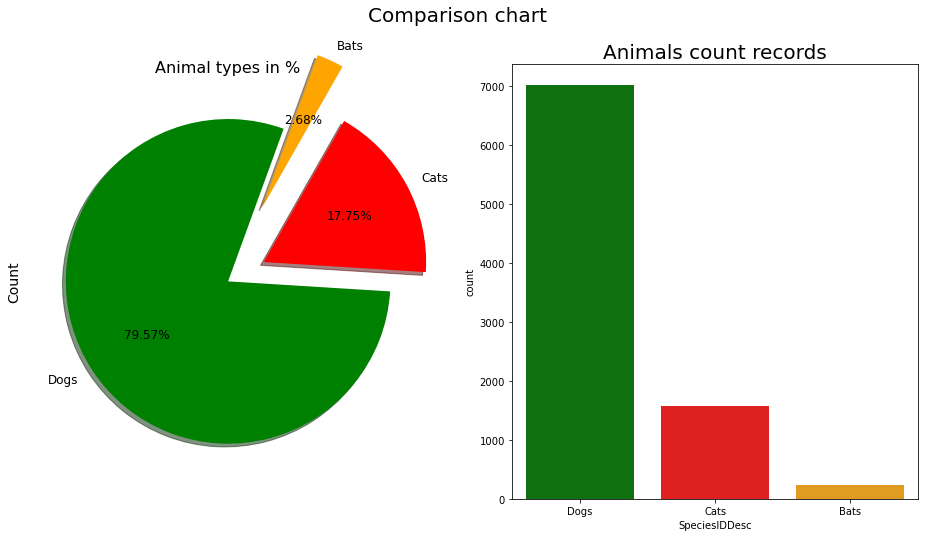

In [15]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["green", "red", "orange"]
labels ="Dogs", "Cats", "Bats"

plt.suptitle('Comparison chart', fontsize=20)

df_filtered["SpeciesIDDesc"].value_counts().plot.pie(explode=[0,0.25,0.5], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)


ax[0].set_title('Animal types in %', fontsize=16)
ax[0].set_ylabel('Count', fontsize=14)

palette = ["green", "red", "orange"]
sns.countplot('SpeciesIDDesc', data=df_filtered, ax=ax[1], palette=colors)
ax[1].set_title('Animals count records', fontsize=20)
ax[1].set_xticklabels(['Dogs', 'Cats', 'Bats'], rotation='horizontal')



#### The maximum number of bites per day is 13.

In [16]:
df_filtered['bite_date'].value_counts(dropna=False)

NaN                    291
2017-08-15 00:00:00     13
2015-03-17 00:00:00     12
2010-04-01 00:00:00     12
2014-04-26 00:00:00     12
                      ... 
2012-05-27 00:00:00      1
2016-03-23 00:00:00      1
2015-01-13 00:00:00      1
1990-02-08 00:00:00      1
2010-04-24 00:00:00      1
Name: bite_date, Length: 2698, dtype: int64

In [17]:
df_filtered = df_filtered[df_filtered['bite_date'].notna()]

df_filtered['year'] = df_filtered.bite_date.str[:4]


In [18]:
df_filtered['year'] = pd.to_numeric(df_filtered['year'])

### Statistics for the number of bites per species per year

#### Statistics for the number of bites per species per year (for all years)

In [19]:
df_filtered.groupby('year')['SpeciesIDDesc'].value_counts()

year  SpeciesIDDesc
1952  DOG                2
1985  DOG                1
1986  DOG                1
1987  DOG                1
1988  DOG                1
1989  DOG                2
1990  DOG                6
1991  DOG                5
1992  DOG                9
      CAT                1
1993  DOG                5
      CAT                1
1994  DOG                7
1995  DOG                1
1999  DOG                1
2001  DOG                1
2002  DOG                1
2007  CAT                1
2009  DOG               12
      CAT                2
2010  DOG              892
      CAT              224
      BAT               10
2011  DOG              907
      CAT              216
      BAT               11
2012  DOG              930
      CAT              200
2013  DOG              903
      CAT              223
      BAT                5
2014  DOG              942
      CAT              203
      BAT                6
2015  DOG              790
      CAT              176
      BA

In [20]:
df_filtered = df_filtered[(df_filtered.year>2009) & (df_filtered.year<2018)]

### Statistics for the number of bites per species per year (2010 - 2017)

In [21]:
bitesBySpeciesByYear = df_filtered.groupby('year')['SpeciesIDDesc'].value_counts()
bitesBySpeciesByYear

year  SpeciesIDDesc
2010  DOG              892
      CAT              224
      BAT               10
2011  DOG              907
      CAT              216
      BAT               11
2012  DOG              930
      CAT              200
2013  DOG              903
      CAT              223
      BAT                5
2014  DOG              942
      CAT              203
      BAT                6
2015  DOG              790
      CAT              176
      BAT                8
2016  DOG              850
      CAT              168
      BAT               22
2017  DOG              657
      CAT              117
      BAT               14
Name: SpeciesIDDesc, dtype: int64

Text(0, 0.5, 'Number of bites')

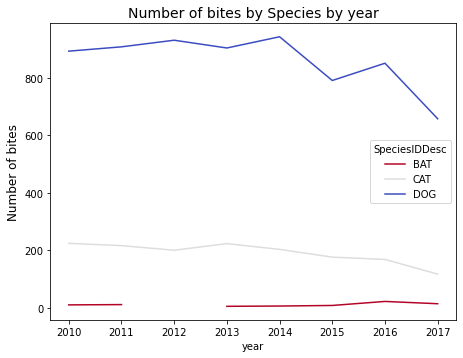

In [22]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)

cmap = plt.cm.coolwarm_r


bitesBySpeciesByYear.unstack().plot(ax=ax1, colormap=cmap)

ax1.set_title('Number of bites by Species by year', fontsize=14)
ax1.set_ylabel('Number of bites', fontsize=12)

Text(0, 0.5, 'Species by year')

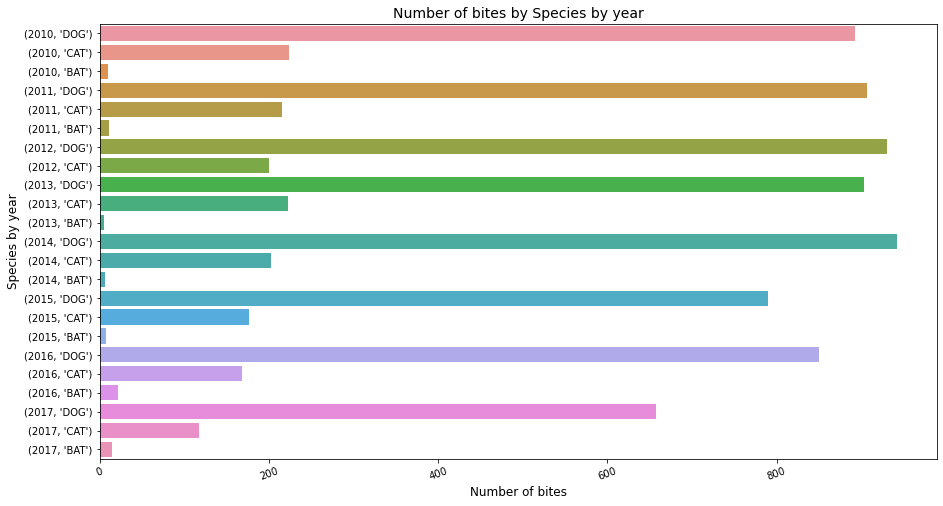

In [23]:
plt.figure(figsize=(15,8))

ax = sns.barplot(x=bitesBySpeciesByYear[0:25],y=bitesBySpeciesByYear[0:25].index)
plt.xticks(rotation=20)
ax.set_title('Number of bites by Species by year', fontsize=14)
ax.set_xlabel('Number of bites', fontsize=12)
ax.set_ylabel('Species by year', fontsize=12)


## Statistics for the number of bites per species per month

In [24]:
def animal_month(animal,data):
    month_list= ['01','02','03','04','05','06','07','08','09','10','11','12']

    numberOfAnimal = []
    for i in month_list:
        x = df_filtered.loc[(df_filtered['SpeciesIDDesc']==animal)&(df_filtered['bite_date'].str.split('-').str[1]==i)]
        numberOfAnimal.append(len(x))
    ax = sns.barplot(x=month_list,y=numberOfAnimal,palette  = "Greens")
    plt.title(animal + ' bite for 12 month')

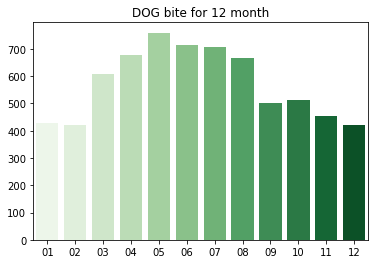

In [25]:
animal_month('DOG',df_filtered)

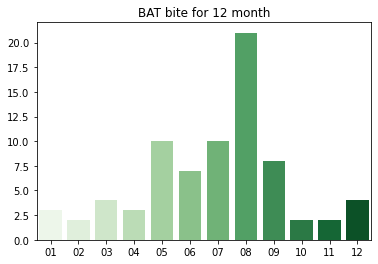

In [26]:
animal_month('BAT',df_filtered)

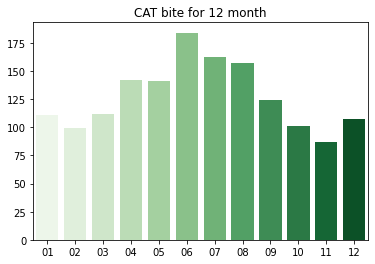

In [27]:
animal_month('CAT',df_filtered)

Although the cat breeding season lasts almost year-round the heat cycle tends to last from spring to fall usually starts on March. It can explain why the peak of cats bites is in June and the almost the similar number of female cats bites - kittens.

### Statistics for the number of bites depending on the breed

In [28]:
count = bites['BreedIDDesc'].value_counts(dropna=False)
count

NaN                5244
PIT BULL           1102
GERM SHEPHERD       327
LABRADOR RETRIV     253
BOXER               181
                   ... 
OLD ENG SHP DOG       1
AMER FOX HOUND        1
CHOCOLATE LAB.        1
WEINER DOG            1
BEARDED COLLIE        1
Name: BreedIDDesc, Length: 102, dtype: int64

Index([              nan,        'PIT BULL',   'GERM SHEPHERD',
       'LABRADOR RETRIV',           'BOXER',      'CHICHAUHUA',
              'SHIH TZU',          'BEAGLE',      'ROTTWEILER',
          'AAUST. TERR.'],
      dtype='object')


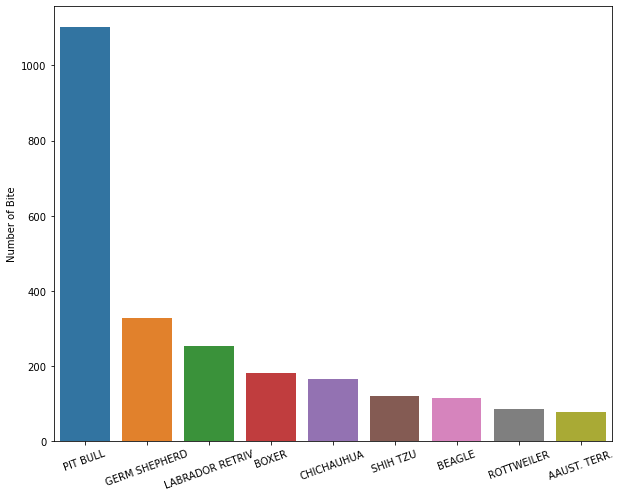

In [29]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x=count[0:10].index,y=count[0:10])
plt.xticks(rotation=20)
plt.ylabel("Number of Bite")

print(count[0:10].index)

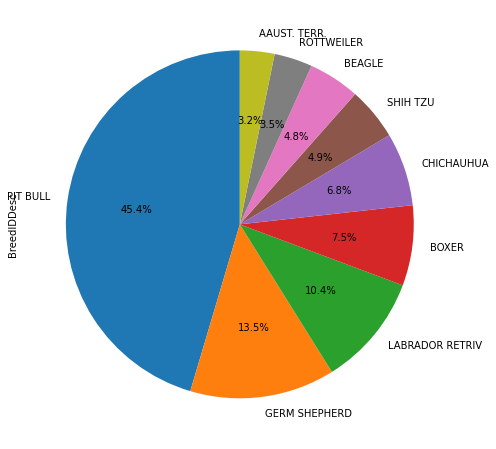

In [30]:
plt.figure(figsize= (20,8))

count[1:10].plot.pie(startangle=90, autopct='%1.1f%%')
plt.show()


In [31]:
bites['WhereBittenIDDesc'].value_counts(dropna=False)

BODY       6213
HEAD       1244
UNKNOWN     930
NaN         616
Name: WhereBittenIDDesc, dtype: int64

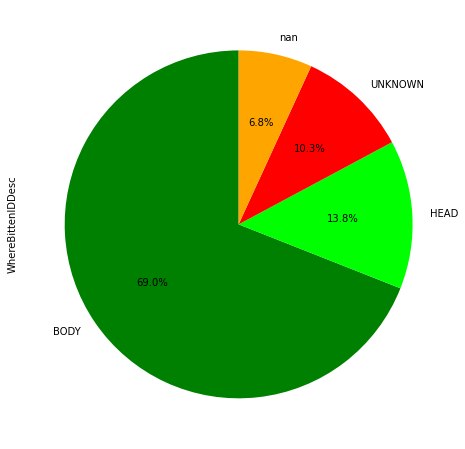

In [32]:
plt.figure(figsize= (20,8))

colors = ["green", "lime","red", "orange"]

bites['WhereBittenIDDesc'].value_counts(dropna=False).plot.pie(startangle=90, autopct='%1.1f%%', colors=colors)
plt.show()


### How many years had passed since the last vaccination

In [33]:
bites.describe().T

,count,mean,std,min,25%,50%,75%,max
vaccination_yrs,3738.0,1.452113,0.848416,1.0,1.0,1.0,1.0,11.0


In [34]:
bites.vaccination_yrs.value_counts(dropna=False)

NaN     5265
1.0     2894
3.0      837
2.0        6
11.0       1
Name: vaccination_yrs, dtype: int64

** The rabies vaccine is highly effective, which is important in our area where there is a threat of rabies from wildlife. Your dog's first rabies vaccination is good for one year and subsequent vaccinations last three years

## Results from lab tests (for rabies)

In [35]:
testResults = bites.ResultsIDDesc.dropna().value_counts()
testResults

UNKNOWN     1240
NEGATIVE     299
POSITIVE       4
Name: ResultsIDDesc, dtype: int64

Text(0.5, 1.0, 'Results from lab tests (for rabies)')

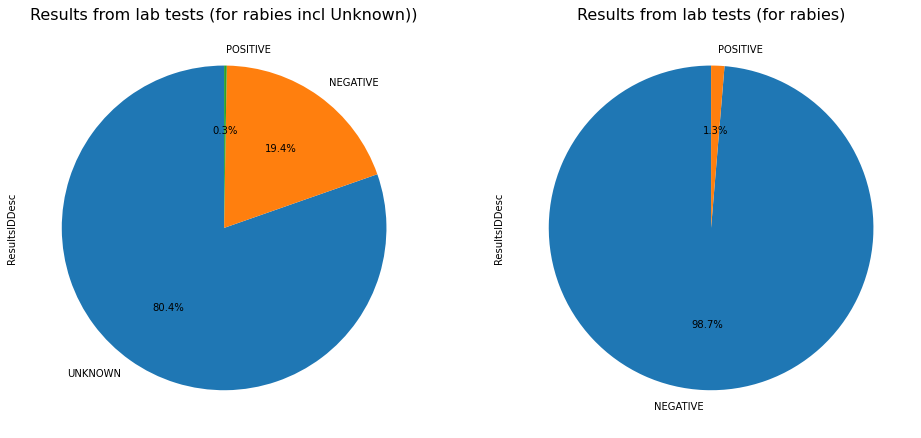

In [36]:
f, ax = plt.subplots(1, 2, figsize=(16,8))

#plt.subplot(1, 1, 1)

testResults.plot.pie(startangle=90, autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Results from lab tests (for rabies incl Unknown))', fontsize=16)


#plt.subplot(1, 2, 2)
testResults[1:].plot.pie(startangle=90, autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('Results from lab tests (for rabies)', fontsize=16)




### What factors are most strongly associated with a positive rabies

In [37]:
results = bites[(bites.ResultsIDDesc=='NEGATIVE') | (bites.ResultsIDDesc=='POSITIVE')]


In [38]:
results.shape

(303, 15)

In [39]:
results.groupby('ResultsIDDesc')['vaccination_yrs'].value_counts()

ResultsIDDesc  vaccination_yrs
NEGATIVE       3.0                2
Name: vaccination_yrs, dtype: int64

In [40]:
results.vaccination_yrs.value_counts()

3.0    2
Name: vaccination_yrs, dtype: int64

Text(0.5, 1.0, 'Positive test result/ number of years passed since last vaccination')

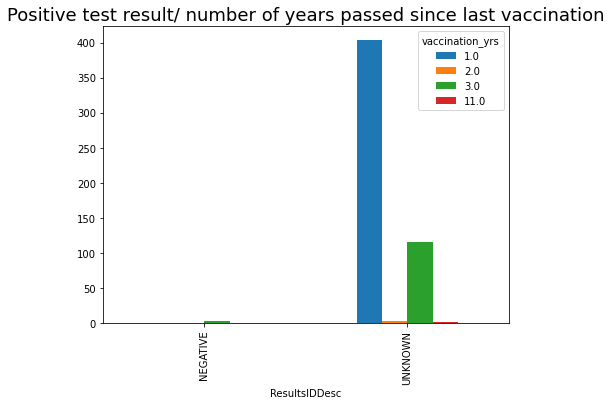

In [41]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
colors = ["orange", "red","green"]

testResByVac = bites.groupby(['ResultsIDDesc','vaccination_yrs']).size()
testResByVac.unstack().plot(kind='bar', stacked=False, ax=ax1, grid=False)
ax1.set_title('Positive test result/ number of years passed since last vaccination', fontsize=18)


* Which animals are most likely to bite humans? 
You are more likely to be bitten by a dogs

* Are some dog breeds more likely to bite? 
The most agressive bread is pit bull

* Male Vs. Female. Who is more aggressive? Does it depend on which animal?
Generally male animals are more aggressive than female. But we could see the data that female cats could very protective

* Is there any dependencies on the time of the yeat to be bitten by an animal?
summer months

* What factors are most strongly associated with a positive rabies test result?

##### Unfortunately based on the given dataset I am not able to support my theory that rabies negative result depeds on number of years passed after the last vaccination